### Logistic Regression

1) It is a supervised learning algorithm used for classification.<br>
2) Logistic regression is a classification algorithm used to assign observations to a discrete set of classes.<br>
3) It is used when the dependent variable (target) is categorical.<br>
4) Logistic regression transforms its output using the <b>logistic or sigmoid function</b> to return a probability value which can then be mapped to two or more discrete classes.<br>
5) It is appropriate algorithm when dependent variable is categorical and consists of two categories (binary).<br>
6) It is a special case of linear regression where the target variable is categorical in nature. It uses a log of odds as the dependent variable. Logistic Regression predicts
<b>
the probability of occurrence of a binary event utilizing a logit or sigmoid function.<br>
7) Odds Ratio = P(event happening) /1-P(event happening) <br>
8) Log of odds = log(P(event happening)/1-P(event happening)) = log(p/(1-p)) = y = ax + b
</b>

In [ ]:
# ypred = mx + c => Linear Regression
# dependent variable is transformed to log(odds)
# log(odds) = ypred = mx + c

### Sigmoid Function

1) In order to map predicted values to probabilities, we use the sigmoid function. The function maps any real value into another value between 0 and 1. In machine learning, we use sigmoid to map predictions to probabilities.<br>
2) The sigmoid function, also called logistic function gives an ‘S’ shaped curve that can take any real-valued number and map it into a value between 0 and 1. If the curve goes to positive infinity, y predicted will become 1, and if the curve goes to negative infinity, y predicted will become 0. If the output of the sigmoid function is more than 0.5, we can classify the outcome as 1 or YES, and if it is less than 0.5, we can classify it as 0 or NO.

<img src="log_reg1.png" align="left">
<img src="log_reg2.png" align="middle">

 where z = ax + b

#### Derivation of Sigmoid Function

<b>log (p/(1-p)) = ax + b</b><br>
=> p / (1-p) = e^(ax + b)<br>
=> p = e^(ax + b) - p* e^(ax + b)<br> 
=> p + p* e^(ax + b) = e^(ax + b) <br>
=> p*(1 + e^(ax + b)) = e^(ax + b)<br>
=> p = e^(ax + b) / (1 + e^(ax + b))<br>
=> Dividing numerator and denominator of RHS by e^(ax + b)<br>
<b>=> p = 1 / (1 + e^-(ax + b)) <br>
=> Logistic or Sigmoid Function</b>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
df = pd.read_excel('insurance_data.xlsx')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


#### Problem Statement - Based on Age of a specific person, predict whether the person bought the insurance or not

In [25]:
df.shape

(27, 2)

In [26]:
df.isnull().sum()

age                 0
bought_insurance    0
dtype: int64

In [28]:
df['bought_insurance'].value_counts()

1    14
0    13
Name: bought_insurance, dtype: int64

In [29]:
x = df[['age']]  # df.iloc[:,:-1]
y = df['bought_insurance']  # df.iloc[:,-1]
print(x.shape)
print(y.shape)

(27, 1)
(27,)


In [31]:
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 1)
(7, 1)
(20,)
(7,)


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve
# roc_auc_score returns the AUC value
# roc_curve generates the ROC_AUC curve

In [37]:
m1 = LogisticRegression()
m1.fit(x_train,y_train)

LogisticRegression()

In [38]:
# Accuracy score
print('Training Score',m1.score(x_train,y_train))
print('Testing Score',m1.score(x_test,y_test))

Training Score 0.9
Testing Score 0.8571428571428571


In [39]:
ypred_m1 = m1.predict(x_test)
print(ypred_m1)

[1 1 0 1 0 1 0]


In [41]:
cm_m1  = confusion_matrix(y_test,ypred_m1)
print(cm_m1)
print(classification_report(y_test,ypred_m1))

[[3 1]
 [0 3]]
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.75      1.00      0.86         3

    accuracy                           0.86         7
   macro avg       0.88      0.88      0.86         7
weighted avg       0.89      0.86      0.86         7



In [44]:
print(accuracy_score(y_test,ypred_m1))
print('Testing Score',m1.score(x_test,y_test))
acc = (3+3)/(3+0+1+3)
print(acc)

0.8571428571428571
Testing Score 0.8571428571428571
0.8571428571428571


In [46]:
m = m1.coef_
c = m1.intercept_
print('Coefficients',m)
print('Intercept',c)

Coefficients [[0.14843194]]
Intercept [-5.37599438]


#### Create a function to implement Sigmoid Function

In [47]:
# p = 1 / (1 + e^-(mx + c)) 
# np.exp()
def sigmoid(x,m,c):
    logistic = 1/(1 +  np.exp(-(m*x + c)))
    print(logistic)

#### Generate Predictions
1) Age = 59<br>
2) Age = 25 

In [48]:
ypred_59 = m1.predict([[59]])
print(ypred_59)
sigmoid(59,m,c)

[1]
[[0.96712102]]


In [49]:
ypred_25 = m1.predict([[25]])
print(ypred_25)
sigmoid(25,m,c)

[0]
[[0.15906574]]


#### How to obtain probabilities for 0 and 1 for each of the test data points?

In [50]:
res = m1.predict_proba(x_test)
print(res)

[[0.1897132  0.8102868 ]
 [0.05798908 0.94201092]
 [0.77204597 0.22795403]
 [0.03794047 0.96205953]
 [0.89191875 0.10808125]
 [0.11449747 0.88550253]
 [0.84093426 0.15906574]]


In [51]:
print(ypred_m1)

[1 1 0 1 0 1 0]


In [52]:
auc_score = roc_auc_score(y_test,m1.predict_proba(x_test)[:,1])
print('AUC_Score',auc_score)

AUC_Score 0.8333333333333334


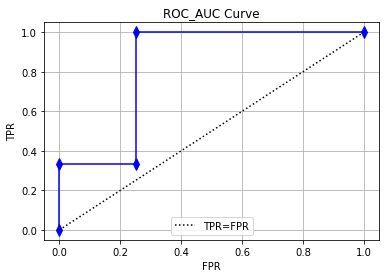

In [61]:
fpr,tpr,thresh = roc_curve(y_test,m1.predict_proba(x_test)[:,1])
plt.plot(fpr,tpr,color='blue',marker='d',markersize=8)
plt.plot([0,1],[0,1],label='TPR=FPR',linestyle=':',color='black')
plt.title('ROC_AUC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=8)
plt.grid()
plt.show()

In [64]:
print('TPR',tpr)
print('FPR',fpr)
print('Threshold',thresh)

TPR [0.         0.33333333 0.33333333 1.         1.        ]
FPR [0.   0.   0.25 0.25 1.  ]
Threshold [1.96205953 0.96205953 0.94201092 0.8102868  0.10808125]


In [ ]:
### Regression
# 1) Linear Regression
# 2) OLS
# 3) SGDRegression
# 4) Ridge
# 5) Lasso

#### Classification
# 1) Logistic Regression
# 2) Decision Tree Classification
# 3) Random Forest Classification
# 4) KNN Classification
# 5) SVM Classification
# 6) Naive Bayes Algorithm
# 7) Boosting Algorithms
# a) AdaBoost
# b) XGBoost

# Clustering Algorithms
# 1) KMeans Clastering
# 2) Agglomerative Clustering

# Dimensionality Reduction
# 1) PCA

#### Interview Q
1) Difference between Probability, odds ratio and likelihood?